In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import os


2021-12-27 10:13:12.039774: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-27 10:13:12.039800: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)


In [3]:
train_dir = '/home/vimalkumar/Downloads/dataset/training_set'
test_dir = '/home/vimalkumar/Downloads/dataset/test_set'

In [4]:
train_dataset = train.flow_from_directory(train_dir,
                                         target_size=(200,200),
                                         batch_size=16,
                                         class_mode='categorical')

test_dataset = train.flow_from_directory(test_dir,
                                         target_size=(200,200),
                                         batch_size=16,
                                         class_mode='categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
train_dataset.class_indices


{'cats': 0, 'dogs': 1}

In [6]:
test_dataset.class_indices


{'cats': 0, 'dogs': 1}

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',
                                                            input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    tf.keras.layers.Flatten(),
                                     
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='sigmoid')]
                                                          )

2021-12-27 10:13:18.961719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-27 10:13:18.961745: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-27 10:13:18.961763: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IG154): /proc/driver/nvidia/version does not exist
2021-12-27 10:13:18.961946: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,
                     #steps_per_epoch=3,
                     epochs=2,
                     validation_data=test_dataset)


2021-12-27 10:13:21.608158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
500/500 [==============================] - 438s 875ms/step - loss: 0.9275 - accuracy: 0.4996 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/2
500/500 [==============================] - 428s 857ms/step - loss: 0.6935 - accuracy: 0.5002 - val_loss: 0.6933 - val_accuracy: 0.5000


In [10]:
model.save('cnn_cat_dog_model.h5')

In [34]:
from glob import glob
folders = glob('/home/vimalkumar/Downloads/dataset/training_set/*')
#print(folders)
print(len(folders))


2


In [35]:
keys = []
values = []
for key in range(len(folders)):
    print(key)
    keys.append(key)
for path in os.listdir(train_dir):
    print(path)
    values.append(path)
print(values)
dic = dict(list(zip(keys,sorted(values))))
print(dic)

0
1
dogs
cats
['dogs', 'cats']
{0: 'cats', 1: 'dogs'}


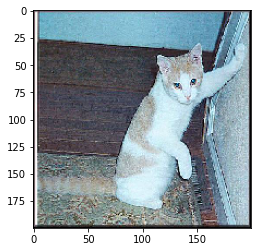

cats


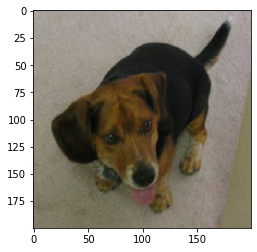

cats


In [38]:
val_dir = '/home/vimalkumar/Downloads/dataset/validation'

for im in os.listdir(val_dir):
    img = image.load_img(val_dir + '//' + im , target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    
    a=np.argmax(val,axis=1)
    
    for v in a:
        #print(v)
        print(dic[v])